In [1]:
import pandas as pd
import numpy as np

Load the dataset

In [2]:
df = pd.read_csv('dataset/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


remove outliers

In [3]:
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

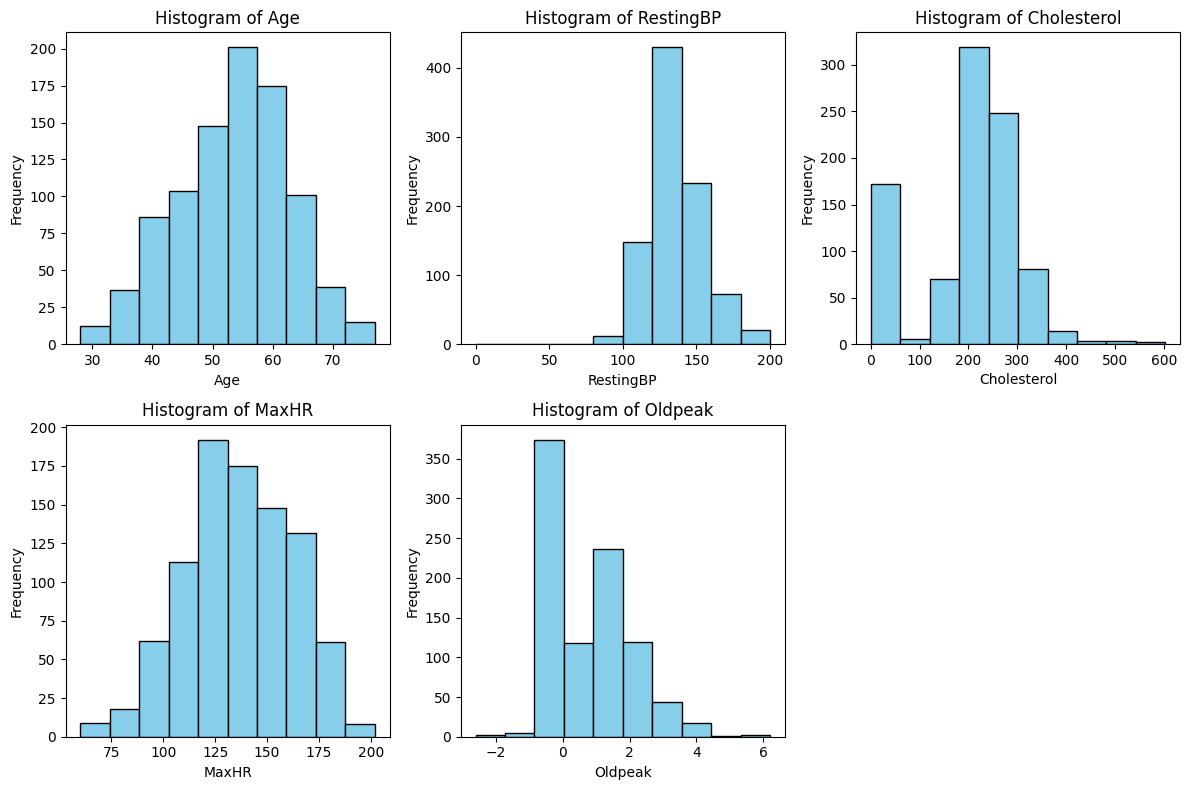

In [4]:
import matplotlib.pyplot as plt

# Mengidentifikasi kolom numerik
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Mengatur grid ukuran secara dinamis berdasarkan jumlah kolom numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [5]:
z_scores = np.abs(stats.zscore(df[numeric_cols]))

(z_scores >= 3).sum()

Age            0
RestingBP      8
Cholesterol    3
MaxHR          1
Oldpeak        7
dtype: int64

In [8]:
df_filtered = df[(z_scores < 3).all(axis=1)]

df_filtered

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [17]:
df_filtered.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

convert text columns to numbers

In [19]:
categorical_cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [71]:
df_encoded = pd.get_dummies(df_filtered,columns=categorical_cols)

df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


Apply scaling

In [72]:
X = df_encoded.drop('HeartDisease', axis='columns')
y = df_encoded.HeartDisease

In [74]:
X.shape

(899, 20)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42815446,  0.46590022,  0.84963584, ..., -0.26018448,
        -0.99888827,  1.13469459],
       [-0.47585532,  1.63471366, -0.16812204, ..., -0.26018448,
         1.00111297, -0.88129441],
       [-1.7455875 , -0.1185065 ,  0.79361247, ..., -0.26018448,
        -0.99888827,  1.13469459],
       ...,
       [ 0.3706328 , -0.1185065 , -0.62564622, ..., -0.26018448,
         1.00111297, -0.88129441],
       [ 0.3706328 , -0.1185065 ,  0.35476274, ..., -0.26018448,
         1.00111297, -0.88129441],
       [-1.63977649,  0.34901888, -0.21480818, ..., -0.26018448,
        -0.99888827,  1.13469459]])

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [77]:
cross_val_score(SVC(),X_scaled,y)

array([0.88333333, 0.82777778, 0.83888889, 0.83888889, 0.75418994])

In [78]:
cross_val_score(RandomForestClassifier(),X_scaled,y)

array([0.88888889, 0.80555556, 0.84444444, 0.84444444, 0.75418994])

In [79]:
cross_val_score(LogisticRegression(),X_scaled,y)

array([0.85555556, 0.83333333, 0.83333333, 0.85      , 0.75977654])

In [80]:
model_params = {
    'svm':{
        'model': SVC(gamma='auto'),
        'param':{
            'C':[1,5,10,20],
            'kernel': ['linear','rbf','poly','sigmoid']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'param':{
            'n_estimators':[100,150,200]
        }
    },
    'logistic_reg':{
        'model': LogisticRegression(multi_class='auto'),
        'param':{
            'solver':['lbfgs','liblinear','newton-cg','newton-cholesky'],
            'C': [1,5,10]
        }
    }
}

In [90]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['param'],cv=5,return_train_score=False)
    clf.fit(X_scaled,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_param': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['best_score','model','best_param'])
df_sorted = df.sort_values(by='best_score', ascending=False)
df_sorted

,best_score,model,best_param
1,0.834178,random_forest,{'n_estimators': 100}
2,0.828634,logistic_reg,"{'C': 5, 'solver': 'liblinear'}"
0,0.827505,svm,"{'C': 1, 'kernel': 'rbf'}"


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)

In [92]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8611111111111112

using PCA

In [93]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [94]:
X.shape

(899, 20)

In [95]:
X_pca.shape

(899, 2)

In [96]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,random_state=30)

In [97]:
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train_pca,y_train)
model2.score(X_test_pca,y_test)

0.6444444444444445

Conclusion

For this dataset, PCA is not necessary since it only contains 15 features